In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import pandas as pd
import sys
sys.path.append("../")
import gyrochrones as gyr
from scipy.stats import binned_statistic_2d
from scipy.optimize import curve_fit

pl.rc('xtick', labelsize=20)
pl.rc('ytick', labelsize=20)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=1)
pl.rc('legend', fontsize=20)
pl.rc('image', cmap='Spectral_r')

def balance(x):
    lower = np.sum(x < 0)
    upper = np.sum(x > 0)
    if (lower != 0) & (upper + lower > 3) :
        return np.log10(lower/upper)
    else:
        return np.nan
    
def lower(x):
    lower = np.sum(x < 0)/len(x)
    return lower

def upper(x):
    upper = np.sum(x > 0)/len(x)
    return upper

%matplotlib inline

In [2]:
df = pd.read_hdf('../../output/good.h5')

gyrochrone = gyr.Gordon2019(df['B_V'])
finite_age_mask = np.isfinite(gyrochrone)
color_mask = (df['B_V'] > 1.0) & (df['B_V'] < 1.6)
perdiff = (np.exp(df['logperiod_mean'][finite_age_mask & color_mask]) - 
           gyrochrone[finite_age_mask & color_mask])
x = df['galcen_x'][finite_age_mask & color_mask]
y = df['galcen_y'][finite_age_mask & color_mask]
z = df['galcen_z'][finite_age_mask & color_mask]
rxy = np.sqrt(x**2 + y**2)

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


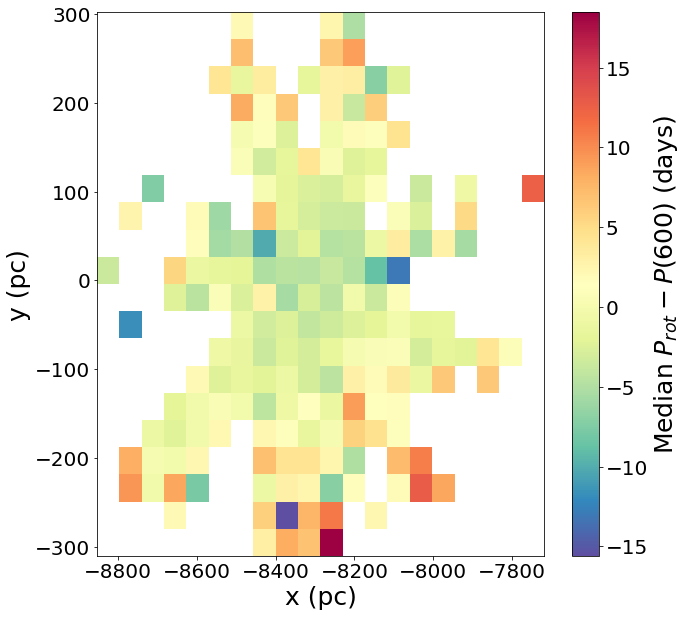

In [3]:
ret = binned_statistic_2d(x, y, perdiff, statistic='median', bins=[20, 20])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest', 
               extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]),
               aspect='auto')
cb = pl.colorbar(im)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("x (pc)")
pl.ylabel("y (pc)")
pl.savefig("x_y_map.pdf")

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


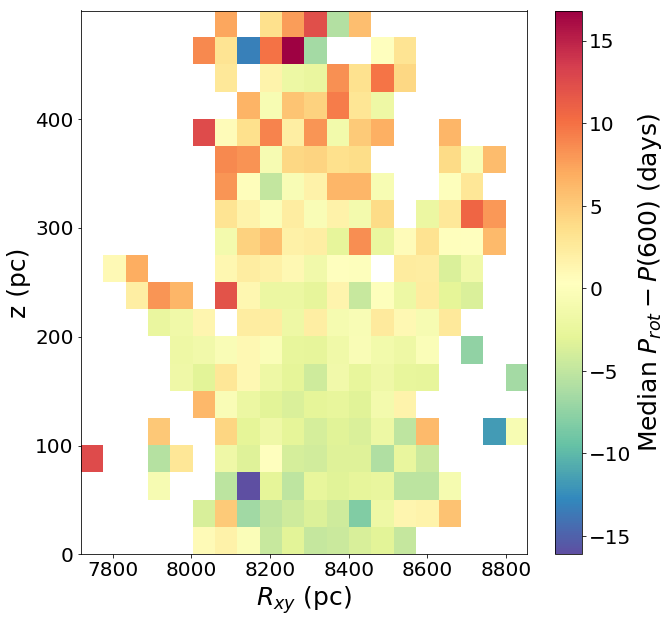

In [4]:
ret = binned_statistic_2d(rxy, np.abs(z), perdiff, statistic='median', bins=[20, 20])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest', 
               extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]),
               aspect='auto')
cb = pl.colorbar(im)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("$R_{xy}$ (pc)")
pl.ylabel("z (pc)")
pl.savefig("rxy_z_map.pdf")

/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


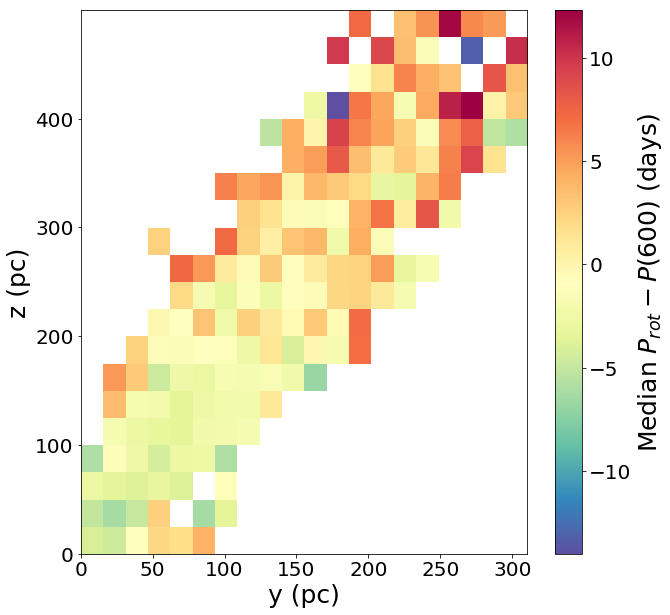

In [5]:
ret = binned_statistic_2d(np.abs(y), np.abs(z), perdiff, statistic='median', bins=[20, 20])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest', 
               extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]),
               aspect='auto')
cb = pl.colorbar(im)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("y (pc)")
pl.ylabel("z (pc)")
pl.savefig("y_z_z_map.pdf")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in long_scalars
/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/usr/local/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidi

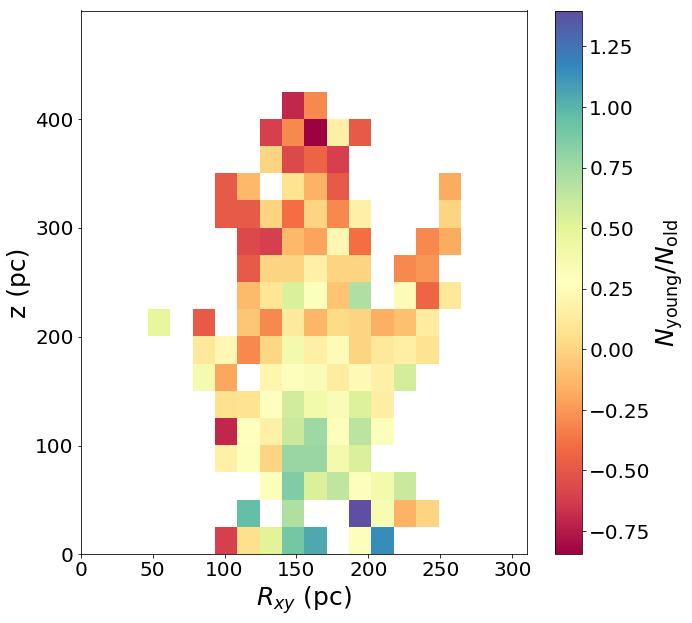

In [6]:
bal = binned_statistic_2d(rxy, np.abs(z), perdiff, statistic=balance, bins=[20, 20])
low = binned_statistic_2d(rxy, np.abs(z), perdiff, statistic=lower, bins=[20, 20])
up = binned_statistic_2d(rxy, np.abs(z), perdiff, statistic=upper, bins=[20, 20])
pl.figure(figsize=(10, 10))
im = pl.imshow(bal.statistic.T, origin='lower', interpolation='nearest', 
               extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]),
               aspect='auto', cmap='Spectral')
cb = pl.colorbar(im)
cb.set_label('$N_\mathrm{young}/N_\mathrm{old}$')
pl.xlabel("$R_{xy}$ (pc)")
pl.ylabel("z (pc)")
pl.savefig("x_y_map.pdf")

In [7]:
stat = bal.statistic
stat[np.isinf(stat)] = -np.inf
stat[np.isnan(stat)] = -np.inf
stat = np.exp(stat)
yvar = np.sum(stat, axis=0)/np.sum(stat > 0, axis=0)
yvar = yvar[np.isfinite(yvar)]
cvar = np.log(yvar)
xvar = bal.y_edge[:-4]

def model(x, amp, L):
    return amp*np.exp(-x/L)

soln = curve_fit(model, xvar, yvar, p0=[2.5, 300])
print(soln[0])

[  1.97278728 345.92683515]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


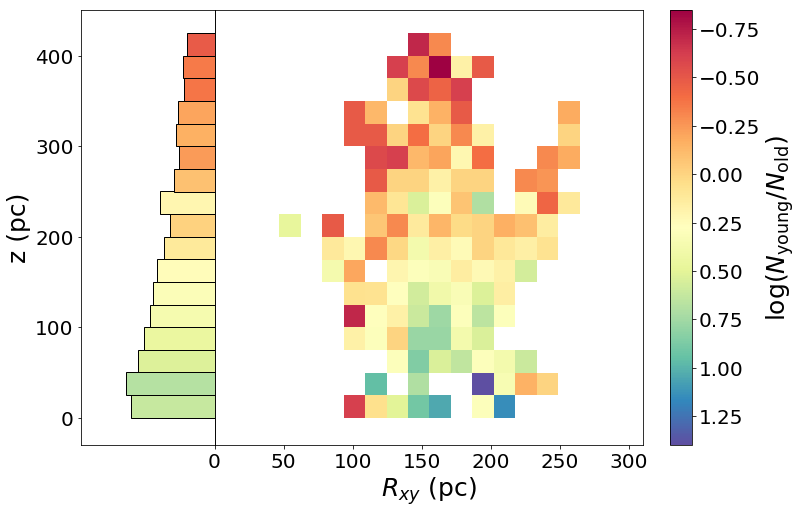

In [8]:
fig = pl.figure(figsize=(12, 8))
gs = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[0.2, 0.8], wspace=0)

ax = fig.add_subplot(gs[1])
ax.imshow(bal.statistic.T, origin='lower', interpolation='nearest', 
               extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]),
               aspect='auto', cmap='Spectral')
cb = pl.colorbar(im)
cb.set_label('$\log(N_\mathrm{young}/N_\mathrm{old})$')
cb.ax.invert_yaxis()
ax.set_xlabel("$R_{xy}$ (pc)")
ax.get_yaxis().set_visible(False)
ax.set_ylim(-30, 450)
cm = cb.get_cmap()

ax = fig.add_subplot(gs[0])
a, b = cb.get_clim()
ax.barh(xvar, yvar, height=25, 
        color=cm((cvar - a)/(b-a)),
       edgecolor='k',
        align='edge')
#ax.plot(model(np.linspace(-20, 470, 100), *soln[0]), np.linspace(-20, 470, 100), 'k', linewidth=3)
ax.set_xlim(3.0, 0)
ax.set_ylim(-30, 450)
ax.set_ylabel("z (pc)")
ax.get_xaxis().set_visible(False)
pl.savefig("/Users/tgordon/Desktop/balance_z.pdf")
#ax.set_xlabel("mean $N_\mathrm{young}/N_\mathrm{old}$")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[  1.97278728 345.92683515]


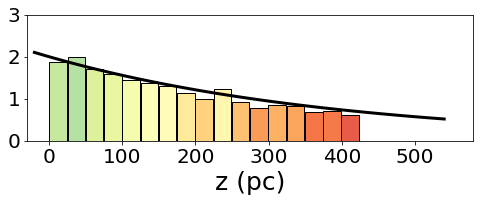

In [9]:
stat = bal.statistic
stat[np.isinf(stat)] = -np.inf
stat[np.isnan(stat)] = -np.inf
stat = np.exp(stat)
yvar = np.sum(stat, axis=0)/np.sum(stat > 0, axis=0)
yvar = yvar[np.isfinite(yvar)]
cvar = np.log(yvar)
xvar = bal.y_edge[:-4]

def model(x, amp, L):
    return amp*np.exp(-x/L)

soln = curve_fit(model, xvar, yvar, p0=[2.5, 300])
print(soln[0])

pl.figure(figsize=(8, 12*0.2))
pl.gcf().subplots_adjust(bottom=0.15)
pl.bar(xvar, yvar, width=24, 
        color=cm((cvar - a)/(b-a)),
        edgecolor='k',
        align='edge')
pl.plot(np.linspace(-20, 540, 100), model(np.linspace(-20, 540, 100), 2, 400), 'k', linewidth=3)
pl.ylim(0, 3.0)
pl.xlim(-30, 580)
pl.xlabel("z (pc)")
#pl.get_xaxis().set_visible(False)
pl.savefig("balance_z_hist.pdf")
#ax.set_xlabel("mean $N_\mathrm{young}/N_\mathrm{old}$")

In [10]:
soln[0]

array([  1.97278728, 345.92683515])

In [11]:
import emcee

def log_likelihood(theta, x, y, yerr):
    amp, L, log_f = theta
    model = amp*np.exp(-x/L)
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    amp, L, log_f = theta
    if 0.0 < amp < 5.0 and 100.0 < L < 500.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

pos = np.array([2.0, 345, 0.0]) + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xvar, yvar, np.zeros(len(xvar))))
sampler.run_mcmc(pos, 5000);

20.354260338104805

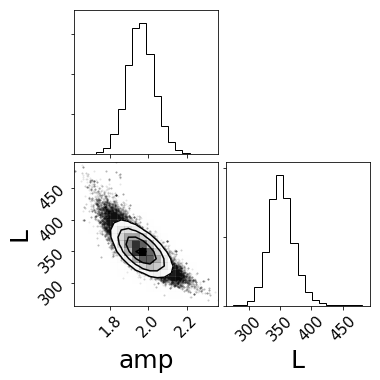

In [32]:
pl.rc('xtick', labelsize=15)
pl.rc('ytick', labelsize=15)
pl.rc('axes', labelsize=25)
pl.rc('axes', titlesize=30)
pl.rc('legend', handlelength=1)
pl.rc('legend', fontsize=20)
pl.rc('image', cmap='Spectral_r')

import corner 
fig = corner.corner(
    sampler.get_chain(flat=True, discard=100)[:, :2], labels=['amp', 'L'], smooth=1)

np.std(sampler.get_chain(flat=True, discard=100)[:, 1])

In [30]:
np.shape(sampler.get_chain(flat=True, discard=100)[:, :2])

(156800, 2)

In [ ]:
ret = binned_statistic_2d(np.abs(y), np.abs(z), perdiff, statistic=balance, bins=[20, 20])
pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest', 
               extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]),
               aspect='auto', cmap='Spectral')
cb = pl.colorbar(im)
cb.set_label('Median $P_{rot} - P(600)$ (days)')
pl.xlabel("y (pc)")
pl.ylabel("z (pc)")
pl.savefig("y_z_z_map.pdf")

In [ ]:
from sklearn import mixture

def get_gmm_indices(res):
    x = np.copy(res.weights_)
    i = np.argmax(x)
    x[i] = np.min(x)
    j = np.argmax(x)
    return i, j

def min_offset(x):
    n_components = 3
    if len(x) <= n_components:
        return np.nan
    try:
        gmm = mixture.GaussianMixture(n_components=n_components)
        res = gmm.fit(np.array(x).reshape(-1, 1))
        t = np.linspace(np.min(x), np.max(x), 1000)
        
        prediction = np.exp(res.score_samples(t.reshape(-1, 1)))
        resp = gmm.predict_proba(t.reshape(-1, 1))
        ind_pred = resp * prediction[:, np.newaxis]
        
        ti, tj = get_gmm_indices(res)
        k, l = np.argmax(ind_pred.T[ti]), np.argmax(ind_pred.T[tj])
        k, l = np.sort((k, l))
        crossover = np.argmax(np.isclose(ind_pred.T[ti][k:l], ind_pred.T[tj][k:l], atol=1e-4))
        b = t[k+crossover]
    except:
        return np.nan
    return b

In [ ]:
ret = binned_statistic_2d(df['r_est'][finite_age_mask & color_mask], 
                          np.abs(df['galcen_z'][finite_age_mask & color_mask]), 
                          perdiff, statistic=min_offset, bins=[10, 10])

pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label("location of minimum ($P_\mathrm{{min}} - P_{{{0}}}$)".format(gyr_age))
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")
pl.savefig("xz_balance.pdf")

In [ ]:
def mean_peak_height(x, maximum):
    n_components = 3
    if len(x) <= n_components:
        return np.nan
    try:
        gmm = mixture.GaussianMixture(n_components=n_components)
        res = gmm.fit(np.array(x).reshape(-1, 1))
        t = np.linspace(np.min(x), np.max(x), 1000)
        
        prediction = np.exp(res.score_samples(t.reshape(-1, 1)))
        resp = gmm.predict_proba(t.reshape(-1, 1))
        ind_pred = resp * prediction[:, np.newaxis]
        
        ti, tj = get_gmm_indices(res)
        k, l = np.argmax(ind_pred.T[ti]), np.argmax(ind_pred.T[tj])
        k, l = np.sort((k, l))
        crossover = np.argmax(np.isclose(ind_pred.T[ti][k:l], ind_pred.T[tj][k:l], atol=1e-4))
        b = t[k+crossover]
        trough = ind_pred.T[ti][k+crossover]
        p1 = np.max(ind_pred.T[ti])
        p2 = np.max(ind_pred.T[tj])
    except:
        return np.nan
    mph = 0.5*(p1+p2-2*trough)
    if mph < maximum:
        return mph
    else:
        return 0

def median_mph(x):
    return np.median([mean_peak_height(x, 1) for i in range(20)])

In [ ]:
ret = binned_statistic_2d(df['r_est'][finite_age_mask & color_mask], 
                          np.abs(df['galcen_z'][finite_age_mask & color_mask]), 
                          perdiff, statistic=median_mph, bins=[10, 10])

pl.figure(figsize=(10, 10))
im = pl.imshow(ret.statistic.T, origin='lower', interpolation='nearest',
         extent=(ret.x_edge[0], ret.x_edge[-1], ret.y_edge[0], ret.y_edge[-1]))
cb = pl.colorbar(im, fraction=0.046)
cb.set_label('depth of minimum')
pl.xlabel("distance (pc)")
pl.ylabel("z (pc)")
pl.savefig("gmm_depth.pdf")

In [ ]:
pl.figure(figsize=(12, 10))
y = df['galcen_y']
rxy = np.sqrt(df['galcen_x']**2 + df['galcen_y']**2)
pl.scatter(rxy, y, c=np.exp(df['logperiod_mean']), alpha=0.5)
cb = pl.colorbar()
cb.set_label('rotation period (days)')
pl.xlabel("$R_\mathrm{xy}$ (pc)")
pl.ylabel("x (pc)")
pl.savefig("/Users/tgordon/Desktop/map.pdf")

In [ ]:
print(len(df))